In [27]:
import os
import PIL
import shutil
import pathlib
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, save_model

In [28]:
directory = r"image_15/"

In [29]:
tf.keras.preprocessing.image_dataset_from_directory(
    directory = r"image_15/",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(150, 150),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 13360 files belonging to 15 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [30]:
batchsize = 32
img_height = 150
img_width = 150

In [31]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  directory = r"image_15/",
  validation_split=0.33,
  subset="training",
  seed=77,
  image_size=(img_height, img_width),
  batch_size= batchsize)

Found 13360 files belonging to 15 classes.
Using 8952 files for training.


In [32]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory = r"image_15/",
  validation_split = 0.33,
  subset = "validation",
  seed = 77,
  image_size = (img_height, img_width),
  batch_size = batchsize)

Found 13360 files belonging to 15 classes.
Using 4408 files for validation.


In [33]:
class_names = train_ds.class_names
print("Class Names :", class_names)

Class Names : ['Apparel_Accessories', 'Arts_Entertainment', 'Baby_Toddler', 'Business_Industrial', 'Cameras_Optics', 'Cell Phones', 'Computers_Tablets', 'Consumer Electronics', 'Health_Beauty', 'Home_Garden', 'Jewelry_Watches', 'Pet Supplies', 'Sporting Goods', 'Toys_Games', 'Vehicles']


In [34]:
train_ds = train_ds.cache().shuffle(1000)
val_ds = val_ds.cache()

In [35]:
num_classes = len(class_names)
num_classes

15

In [36]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 64)       

In [40]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
280/280 [==============================] - 113s 406ms/step - loss: 2.4840 - accuracy: 0.1769 - val_loss: 2.3776 - val_accuracy: 0.2225
Epoch 2/20
280/280 [==============================] - 119s 423ms/step - loss: 2.2449 - accuracy: 0.2755 - val_loss: 2.2726 - val_accuracy: 0.2602
Epoch 3/20
280/280 [==============================] - 125s 449ms/step - loss: 1.9931 - accuracy: 0.3606 - val_loss: 2.2625 - val_accuracy: 0.2790
Epoch 4/20
280/280 [==============================] - 140s 499ms/step - loss: 1.5996 - accuracy: 0.4894 - val_loss: 2.3408 - val_accuracy: 0.3092
Epoch 5/20
280/280 [==============================] - 154s 548ms/step - loss: 1.0807 - accuracy: 0.6537 - val_loss: 2.7470 - val_accuracy: 0.3008
Epoch 6/20
280/280 [==============================] - 1003s 4s/step - loss: 0.6034 - accuracy: 0.8136 - val_loss: 3.5610 - val_accuracy: 0.2974
Epoch 7/20
280/280 [==============================] - 113s 405ms/step - loss: 0.2923 - accuracy: 0.9128 - val_loss: 4.6085 - v

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [42]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [43]:
epochs_range = range(epochs)

Text(0.5, 1.0, 'Training and Validation Accuracy')

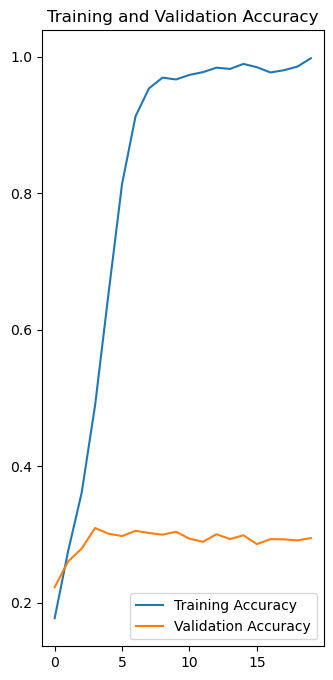

In [44]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

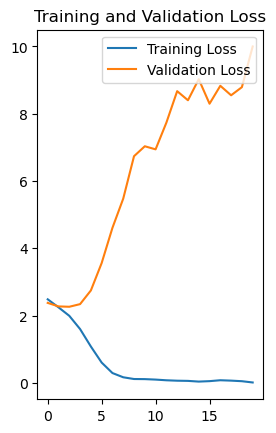

In [45]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
y_pred = model.predict(val_ds)

138/138 [==============================] - 29s 202ms/step


In [47]:
model.predict(val_ds)

138/138 [==============================] - 10s 73ms/step


array([[  4.46063   ,   5.831933  , -11.879838  , ..., -19.07715   ,
         16.645441  ,  -2.1794164 ],
       [-18.752504  ,  13.719332  , -14.838316  , ...,   6.554145  ,
         -5.471306  ,  24.04824   ],
       [-21.721786  ,  24.12298   ,  -3.1599443 , ...,  -4.16935   ,
         -8.630494  , -12.62582   ],
       ...,
       [-17.037207  ,  19.88473   , -16.646933  , ...,  -0.98456603,
         11.586776  ,  -3.546992  ],
       [  3.5877566 ,   7.079986  ,   1.3317782 , ...,  -1.8099666 ,
         -1.243189  , -12.019981  ],
       [ -5.9211206 ,   7.126282  ,  -4.5479503 , ...,  11.679771  ,
          7.59222   ,  15.935549  ]], dtype=float32)

In [48]:
y_pred[0][0]

4.46063

In [49]:
y_pred[0]

array([  4.46063  ,   5.831933 , -11.879838 ,   1.3950425, -17.279276 ,
       -26.158384 ,   3.898607 ,  17.4025   ,   4.120799 ,   8.455591 ,
       -11.741118 ,   4.604651 , -19.07715  ,  16.645441 ,  -2.1794164],
      dtype=float32)

In [50]:
save_model(model, 'image_modelfl.h5')

In [51]:
model.save("image_modelfl15.hdf5")